In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns
import numpy.ma as ma

In [2]:
result = np.zeros((181,600))
i=0

In [3]:
#data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0141-08.salinity.nc')
#plotvar = data.variables['SALT'][0,:,:]
#plotvar[plotvar < 0] = np.nan

In [4]:
#np.nanmean(plotvar,axis=0)
###  30 —— 408m
###  40 -- 1106m
###  50 -- 3133m

In [5]:
# 224:343 --------- 64S-69S
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(150,331)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SALT.nc')
        plotvar = data.variables['SALT'][0,:,:]
        #plotvar[plotvar < 0] = np.nan
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[247:365,700:1300]
        latt = latt[247:365,700:1300]
        plotvar = plotvar[:5,247:365,700:1300]
        #plotvar.mask = ma.nomask
        #plotvar[plotvar >200] = np.nan
        #plotvar.mask = ma.nomask
        aveplot = plotvar.mean(axis=0)
        aveplot = aveplot.mean(axis=0)
        result[i,:] = aveplot[:]
        
        i = i + 1

In [6]:
np.save(file="salt150-331.npy", arr=result)

In [7]:
#resultmean = result.mean(axis = 0)
#final1 = result - resultmean

In [8]:
b= np.load(file="salt338-500.npy")
result= np.load(file="salt150-331.npy")

In [9]:
b.shape

(162, 600)

In [10]:
result22= np.load(file="salt330-337.npy")

In [11]:
result22.shape

(8, 600)

In [12]:
result22 = result22[1:8,:]

In [13]:
#mid = np.zeros((10,800))
#mid[mid == 0]=np.nan
dd = np.vstack((result,result22))
ddd = np.vstack((dd,b))

In [14]:
A = np.arange(350)
B = np.arange(600)
xx, yy = np.meshgrid(B, A)

In [15]:
#nice_cmap=sns.diverging_palette(245, 15, n=30,as_cmap=True)
#nice_cmap=plt.get_cmap('seismic')
nice_cmap=plt.get_cmap('Reds')
lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,\
                      200,210,220])
#new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
new_cmap = cols.ListedColormap(lev_cmap,"Reds")
my_font = {'fontname':'Cambria', 'size':'20'}


#################################################################


#nice_levels = [34.43,34.44,34.45,34.46,34.47,34.48,34.49,34.50,34.51,34.52,\
               #34.53,34.54,34.55,34.56,34.57,34.58,34.59,34.6,34.61,34.62,34.63,34.64,34.65,34.66,34.67]
nice_levels = [34.41,34.43,34.45,34.47,34.49,34.51,\
               34.53,34.55,34.57,34.59,34.61,34.63,34.65,34.67,34.69]

norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#bar_levels = [34.640,34.655,34.67,34.685,34.70,34.715,34.73,34.745]
#bar_levels = [34.10,34.16,34.22,34.28,34.34,34.40,34.46,34.52,34.58]

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'spacing'
  
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


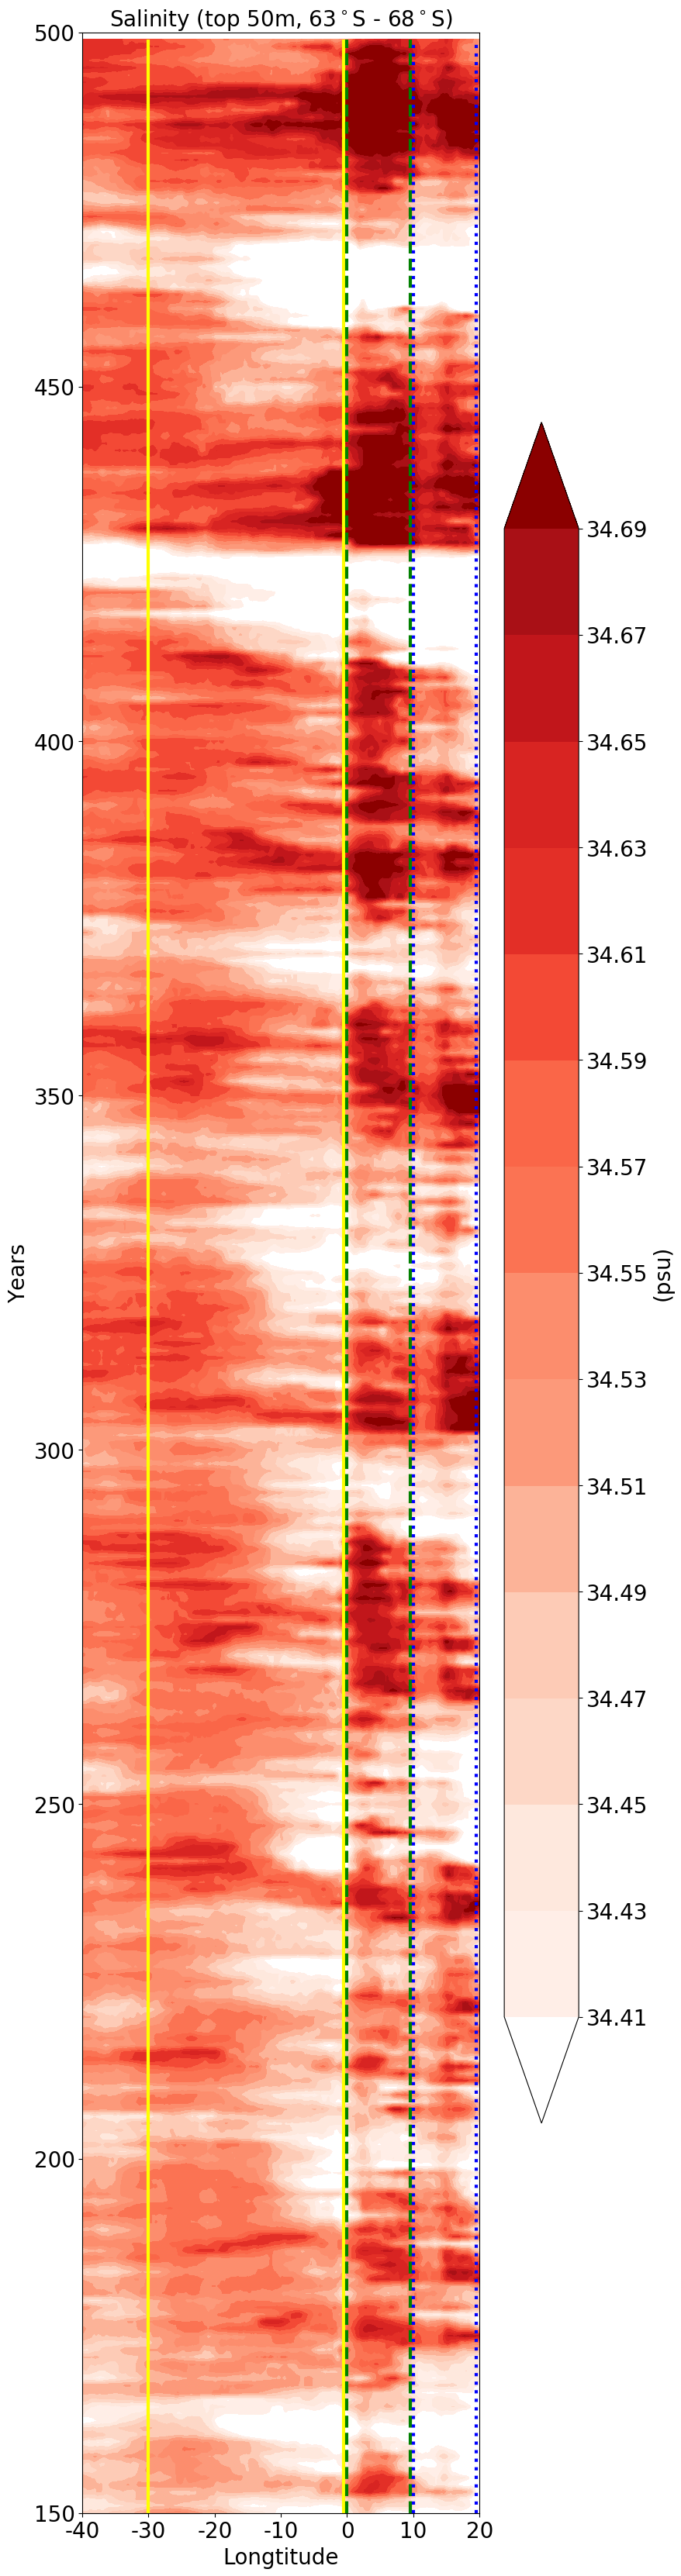

In [16]:
# plot the result
fig = plt.figure(figsize=(8, 40),dpi=100)
ax0 = fig.add_axes([0.15, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.contourf(xx, yy,ddd,cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='both')
im.cmap.set_over('darkred')
im.cmap.set_under('white')
plt.vlines(100, 0, 349, colors = "yellow",linestyles = "solid",linewidth=3)
plt.vlines(395, 0, 349, colors = "yellow",linestyles = "solid",linewidth=3)


plt.vlines(400, 0, 349, colors = "green",linestyles = "dashed",linewidth=3)
plt.vlines(495, 0, 349, colors = "green",linestyles = "dashed",linewidth=3)

plt.vlines(500, 0, 349, colors = "blue",linestyles = "dotted",linewidth=3)
plt.vlines(595, 0, 349, colors = "blue",linestyles = "dotted",linewidth=3)


#plt.vlines(700, 0, 349, colors = "purple",linestyles = 'dashdot',linewidth=3)
#plt.vlines(795, 0, 349, colors = "purple",linestyles = "dashdot",linewidth=3)


#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax0, ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=20)
cbar.set_label('(psu)', **my_font)
#plt.clabel(CS, inline=0.1, fontsize=10)

#############################################################################
##设定X坐标值
plt.xticks(range(0,601,100), ['-40','-30', '-20', '-10', '0','10','20','30'],**my_font)
plt.yticks(range(0,351,50), ['150', '200', '250', '300', '350','400','450','500'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('Salinity (top 50m, 63$^\circ$S - 68$^\circ$S)',**my_font)
plt.savefig("smonthly1.png",bbox_inches='tight',dpi=fig.dpi)

In [19]:
np.savetxt('salinityplot.out',ddd)

In [20]:
ddd.shape

(350, 600)

In [21]:
weddle = ddd[:,200:300]
maudrise = ddd[:,500:600]
astrid = ddd[:,600:700]
upstream = ddd[:,700:800]

In [22]:
weddlemean = weddle.mean(axis=1)
maudmean = maudrise.mean(axis=1)
astridmean = astrid.mean(axis=1)
upmean = upstream.mean(axis=1)

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice.
  This is separate from the ipykernel package so we can avoid doing imports until
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice.
  after removing the cwd from sys.path.


In [23]:
np.savetxt('weddlemean.out', weddlemean)
np.savetxt('maudmean.out', maudmean)
np.savetxt('astridmean.out', astridmean)
np.savetxt('upmean.out', upmean)

In [24]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

arpxx = np.loadtxt("arpxx.out")
uppxx = np.loadtxt("uppxx.out")

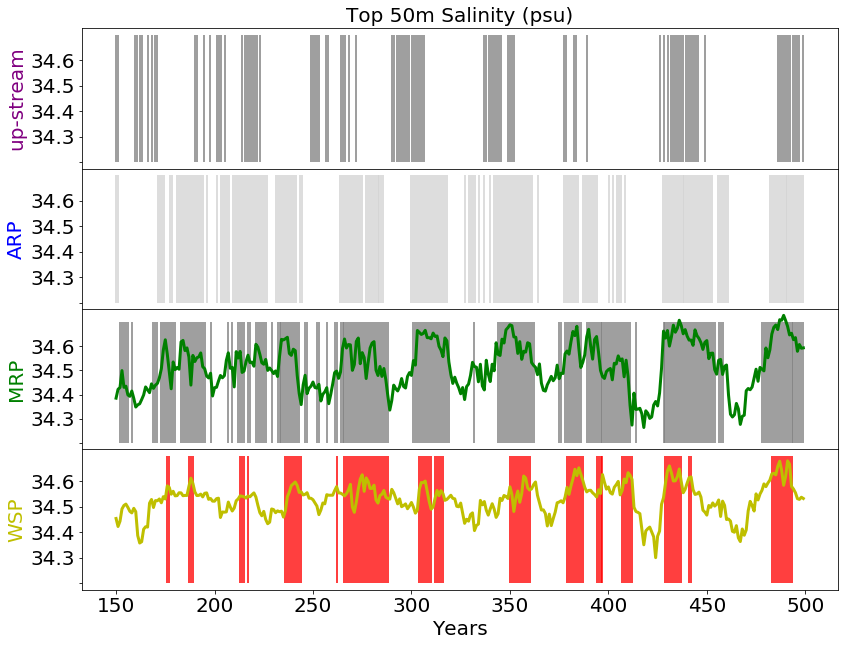

In [25]:
fig = plt.figure(figsize=(15,15))
#######################################
my_font = {'fontname':'Cambria', 'size':'20'}
fig.add_axes([0.15,0.835,0.70,0.13])
##########################################################
plt.plot(upmean,'purple',linewidth=3)
plt.yticks(np.arange(34.2,34.7,0.1), ['','34.3', '34.4','34.5', '34.6'],**my_font)
plt.ylabel('up-stream',color='purple',**my_font)
plt.vlines(uppxx,34.2,34.7, colors = "grey")
plt.title('Top 50m Salinity (psu)',**my_font)
####################################################
con_ax_top = fig.add_axes([0.15,0.705,0.70,0.13])
plt.plot(astridmean,'blue',linewidth=3)
plt.yticks(np.arange(34.2,34.7,0.1), ['','34.3', '34.4','34.5', '34.6'],**my_font)
plt.vlines(arpxx,34.2,34.7, colors = "lightgrey")
plt.ylabel('ARP',color='blue',**my_font)

#############################
fig.add_axes([0.15,0.575,0.70,0.13])
plt.plot(maudmean,'green',linewidth=3)
plt.yticks(np.arange(34.2,34.7,0.1), ['','34.3', '34.4','34.5', '34.6'],**my_font)
plt.vlines(mrpxx,34.2,34.7, colors = "grey")
plt.ylabel('MRP',color='green',**my_font)
#####################################################
fig.add_axes([0.15,0.445,0.70,0.13])
plt.plot(weddlemean,'y',linewidth=3)
plt.ylabel('WSP',color='y',**my_font)
plt.yticks(np.arange(34.2,34.7,0.1), ['','34.3', '34.4','34.5', '34.6'],**my_font)
plt.xticks(range(0,351,50), ['150', '200', '250','300','350','400','450','500'],**my_font)
plt.vlines(wspxx,34.2,34.7,  colors = "r")
plt.xlabel('Years',**my_font)
plt.savefig("salt4.png",bbox_inches='tight',dpi=fig.dpi)

In [22]:
final = np.zeros((40,800))
years = np.arange(0,480,12)
i = 0
for ii in years:
    final[i,:] = (result[ii,:]+result[ii+1,:]+result[ii+2,:]+result[ii+3,:]+result[ii+4,:]+result[ii+5,:]+result[ii+6,:]+result[ii+7,:]+result[ii+8,:]+result[ii+9,:]+result[ii+10,:]+result[ii+11,:])/12
    #final[i,:] = (result[ii,:]+result[ii+1,:]+result[ii+2,:])/3
    i = i+1

IndexError: index 181 is out of bounds for axis 0 with size 181

In [ ]:
ave = final.mean(axis =0)
fi = final - ave

NameError: name 'fi' is not defined

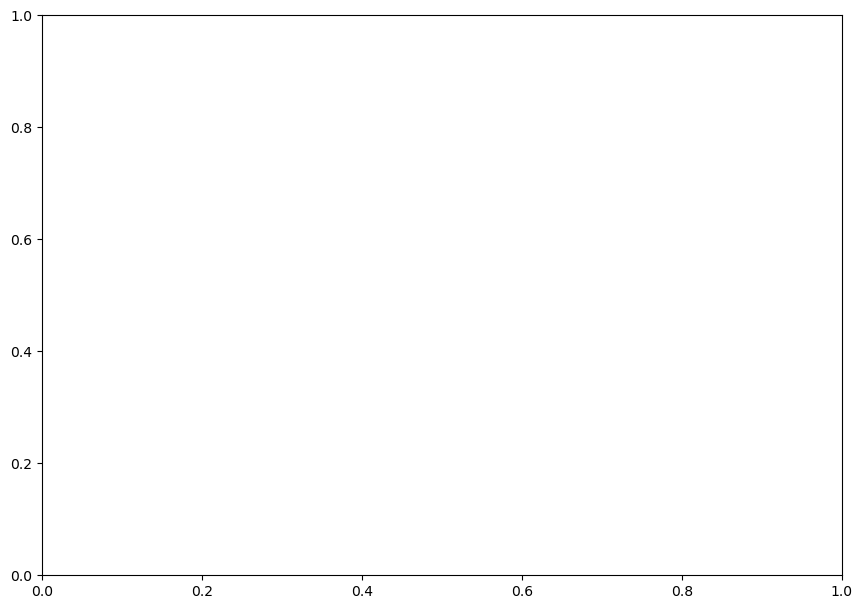

In [26]:
A = np.arange(40)
B = np.arange(800)
xx, yy = np.meshgrid(B, A)
# plot the result
fig = plt.figure(figsize=(10, 7),dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.contourf(xx, yy, fi,cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
plt.vlines(530, 0, 39, colors = "g",linestyles = "dashed")
plt.vlines(620, 0, 39, colors = "y",linestyles = "dashed")
#plt.vlines(530, 0, 159, colors = "y",linestyles = "dashed")
#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax0, ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('(psu)', **my_font)
#plt.clabel(CS, inline=0.1, fontsize=10)

#############################################################################
##设定X坐标值
plt.xticks(range(0,801,100), ['-50','-40','-30', '-20', '-10', '0','10','20','30'],**my_font)
plt.yticks(range(0,40,5), ['140', '145', '150', '155', '160','165','170','175','180'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('Salinity Anomaly (3133m) Averaged(64$^\circ$S - 68$^\circ$S)',**my_font)
plt.savefig("salt3133aa.png")

In [ ]:
latt